# [Mencari Jumlah Cluster yang Optimal](https://academy.dqlab.id/main/livecode/294/563/2815)

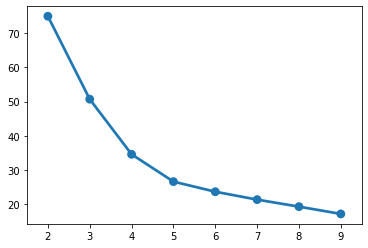

In [1]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_model = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost
cost = {}
for k in range(2,10):
  kproto = KPrototypes(n_clusters = k,random_state=75)
  kproto.fit_predict(df_model, categorical=[0,1,2])
  cost[k]= kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

# [Membuat Model](https://academy.dqlab.id/main/livecode/294/563/2816)

In [2]:
import pickle
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

# [Menggunakan Model](https://academy.dqlab.id/main/livecode/294/563/2817)

In [3]:
import pandas as pd
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        2  
2      Cluster              5286429        4  
3      Cluster              5204498        4  
4      Cluster             10615206        0  


# [Menampilkan Cluster Tiap Pelanggan](https://academy.dqlab.id/main/livecode/294/563/2818)

In [4]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):
    print('\nPelanggan cluster: {}\n'.format(i))
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4    

# [Visualisasi Hasil Clustering - Box Plot](https://academy.dqlab.id/main/livecode/294/563/2819)

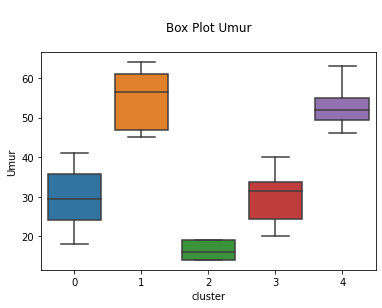

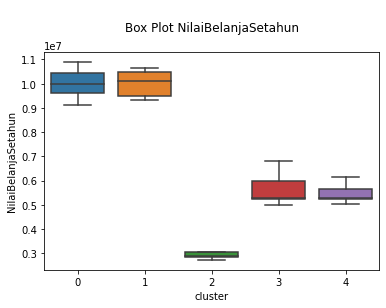

In [5]:
import matplotlib.pyplot as plt
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

# [Visualisasi Hasil Clustering - Count Plot](https://academy.dqlab.id/main/livecode/294/563/2820)

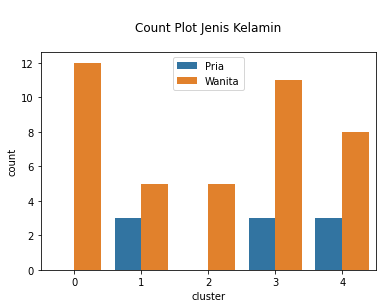

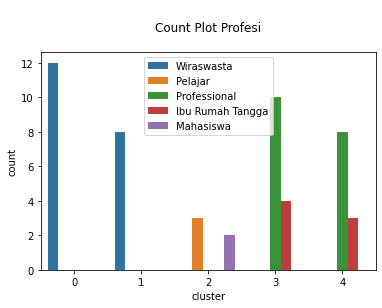

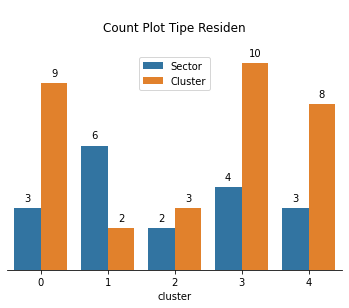

In [8]:
import matplotlib.pyplot as plt
# Data Kategorikal
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']

for i in kolom_categorical:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right=True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

# [Menamakan Cluster](https://academy.dqlab.id/main/livecode/294/563/2821)

In [9]:
# Mapping nama kolom
df_final['segmen'] = df_final['cluster'].map({
0: 'Diamond Young Member',
1: 'Diamond Senior Member',
2: 'Silver Member',
3: 'Gold Young Member',
4: 'Gold Senior Member'
})

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

# [Mempersiapkan Data Baru](https://academy.dqlab.id/main/livecode/294/564/2826)

In [10]:
# Data Baru
data = [{
    'Customer_ID': 'CUST-100' ,
    'Nama Pelanggan': 'Joko' ,
    'Jenis Kelamin': 'Pria',
    'Umur': 45,
    'Profesi': 'Wiraswasta',
    'Tipe Residen': 'Cluster' ,
    'NilaiBelanjaSetahun': 8230000
}]

# Membuat Data Frame
new_df = pd.DataFrame(data)

# Melihat Data
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


# [Membuat Fungsi Data Pemrosesan](https://academy.dqlab.id/main/livecode/294/564/2827)

In [12]:
def data_preprocess(data):
    # Konversi Kategorikal data
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

    df_encode = data[kolom_kategorikal].copy()

    ## Jenis Kelamin
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({
    'Pria': 0,
    'Wanita' : 1
    })

    ## Profesi
    df_encode['Profesi'] = df_encode['Profesi'].map({
    'Ibu Rumah Tangga': 0,
    'Mahasiswa' : 1,
    'Pelajar': 2,
    'Professional': 3,
    'Wiraswasta': 4
    })

    ## Tipe Residen
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({
    'Cluster': 0,
    'Sector' : 1
    })

    # Standardisasi Numerical Data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']
    df_std = data[kolom_numerik].copy()

    ## Standardisasi Kolom Umur
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

    ## Standardisasi Kolom Nilai Belanja Setahun
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

    # Menggabungkan Kategorikal dan numerikal data
    df_model = df_encode.merge(df_std, left_index = True,
    right_index=True, how = 'left')

    return df_model

# Menjalankan fungsi
new_df_model = data_preprocess(new_df)

print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


# [Memanggil Model dan Melakukan Prediksi](https://academy.dqlab.id/main/livecode/294/564/2828)

In [14]:
def modelling (data):

    # Memanggil Model
    kpoto = pickle.load(open('cluster.pkl', 'rb'))

    # Melakukan Prediksi
    clusters = kpoto.predict(data,categorical=[0,1,2])

    return clusters

# Menjalankan Fungsi
clusters = modelling(new_df_model)

print(clusters)

[1]


# [Menamakan Segmen](https://academy.dqlab.id/main/livecode/294/564/2829)

In [15]:
def menamakan_segmen (data_asli, clusters):

    # Menggabungkan cluster dan data asli
    final_df = data_asli.copy()
    final_df['cluster'] = clusters

    # Menamakan segmen
    final_df['segmen'] = final_df['cluster'].map({
    0: 'Diamond Young Member',
    1: 'Diamond Senior Member',
    2: 'Silver Students',
    3: 'Gold Young Member',
    4: 'Gold Senior Member'
    })

    return final_df

# Menjalankan Fungsi
new_final_df = menamakan_segmen(new_df,clusters)

print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  
